In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from textblob import TextBlob
def pos_tag(text):
    try:
        return TextBlob(text).tags
    except:
        return None
def get_adjectives(text):    
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if (tag == "NN" or tag == "NNS" or tag == "NNP" or tag == "NNPS" or tag == "RB" or tag == "RBR" or tag == "RBS" or tag == "RP" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ" or tag == "FW" )]
import matplotlib.pyplot as plt

from socket import SocketIO
import pandas as pd
import numpy as np
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP

review_datasets = pd.read_excel(r'C:\Users\tretiak\Desktop\Topic_modeling\Articles_with_topics_6.0.xlsx')
reviews_datasets1 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets2=reviews_datasets1.iloc [0:8000]
reviews_datasets4 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets=reviews_datasets2[~reviews_datasets1.Articles.str.contains('None')]
reviews_datasets.head()
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
import gensim.corpora as corpora
from nltk.stem import WordNetLemmatizer
from nltk.stem import porter
stop_words=set(nltk.corpus.stopwords.words('english'))
new_stopwords = ["Background", "Main body", "Conclusion", "Methodology", "Methods", "Results", "Conclusions", "also", "Aim","Materials", "Aims", "Objective", "Design", "Interpretation", "Objectives", "Context"]
new_stopwords.extend(['study',"bla",'activity','found','two','different','identified','expression','including','clinical','showed','patient','associated','one','result','using','may','increased','presence','used','effect','among','development','level','new','analysis','observed','target','novel','However','potential','concentration','system','role','specie','method','compound','important','respectively','well','increase','due','three','high','detected','show','combination','revealed','change','rate','involved','type','common','model','addition','several','growth','data','present','within','multiple','major','class','known','tested','demonstrated','group','compared','region','factor','complex','response','determined','production','effective','strategy','control','investigated','approach','specific','reduced','various','function','many','responsible', 'ability','four','significant','similar','related','variant','profile','case','total','pathway','sensitive','studied','report','selection','performed','suggesting','higher','understanding','shown','first','substitution','active','via','selected','increasing','caused','reported','number','test','element','finding','time','highly' ])

#print(new_stopwords)
exclude = set(string.punctuation)

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
def alphabet(ch):
    return ch.replace("α","alpha").replace("MICs","MIC").replace("β","beta").replace("γ","gamma").replace("δ","delta").replace("ε","epsilon").replace("ζ","zeta").replace("η","eta").replace("θ","theta").replace("ι","iota").replace("κ","kappa").replace("λ","lambda").replace("μ","mu").replace("ν","nu").replace("ξ","xi").replace("ο","omicron").replace("π","pi").replace("ρ","rho").replace("σ","sigma").replace("τ","tau").replace("υ","upsilon").replace("φ","phi").replace("χ","chi").replace("ψ","psi").replace("ω","omega")


def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=" ".join([le.lemmatize(i) for i in word_tokens if (( i.lower() not in stop_words) and ( not  i.isdigit()) and (len(i)>1) and ( le.lemmatize(i) not in stop_words) ) ])
    cleaned_text1=" ".join(alphabet(ch) for ch in tokens.split() if (ch not in exclude ))
    #cleaned_text3=" ".join(get_adjectives(ch) for ch in tokens.split())
    cleaned_text2=" ".join(ch for ch in cleaned_text1.split(".") )
    #cleaned_text2=[ch for ch in cleaned_text1.split(".")] 
    #cleaned_text3=" ".join(get_adjectives(ch) for ch in cleaned_text2 )
    new_stopwords1=" ".join([le.lemmatize(i) for i in new_stopwords]) 
    stop_words1=" ".join([le.lemmatize(i) for i in stop_words])
    cleaned_text3=" ".join(ch for ch in cleaned_text2.split() if ( ( not  ch.isdigit()) and (len(ch)>1)))
    cleaned_text=" ".join(ch for ch in cleaned_text3.split() if ( ch not in new_stopwords1 ) and ( ch not in stop_words1 ) )
    return cleaned_text
reviews_datasets['cleaned_text']=reviews_datasets['Articles'].apply(clean_text)
reviews_datasets['words'] = reviews_datasets['cleaned_text'].apply(get_adjectives)
doc_clean=[]
for doc in reviews_datasets['cleaned_text']:
    doc_clean.append(get_adjectives(doc))
   

bigram_mod = bigrams(doc_clean)
bigram = [bigram_mod[review] for review in doc_clean ]

#creating LDA model
id2word = corpora.Dictionary(bigram)
print("Without filter extreme",len(id2word))
id2word.filter_extremes(no_below=1, no_above=0.4)
print("With filter extreme",len(id2word))
corpus = [id2word.doc2bow(text) for text in bigram]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Without filter extreme 43418
With filter extreme 43414


In [3]:
writer = pd.ExcelWriter('reviews_datasets.xlsx')
reviews_datasets['cleaned_text'].to_excel(writer)
writer.save()


In [4]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
reviews_datasets['review_without_stopwords'] = reviews_datasets['Articles'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# Lemmatization
reviews_datasets['review_lemmatized'] = reviews_datasets['review_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
writer = pd.ExcelWriter('review_lemmatized.xlsx')
reviews_datasets.to_excel(writer)
writer.save()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
reviews_datasets['review_without_stopwords'] = reviews_datasets['Articles'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# Lemmatization
reviews_datasets['review_lemmatized'] = reviews_datasets['review_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
writer = pd.ExcelWriter('review_lemmatized.xlsx')
reviews_datasets.to_excel(writer)
writer.save()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
review_lemmatized = reviews_datasets['review_lemmatized'] .tolist()
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(review_lemmatized)
topic_model.get_topic_info()
topic_model.visualize_barchart(top_n_topics=12, n_words=30)

KeyboardInterrupt: 

In [ ]:
review_lemmatized = reviews_datasets['review_lemmatized'] .tolist()
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(review_lemmatized)
topic_model.get_topic_info()
topic_model.visualize_barchart(top_n_topics=12, n_words=10)

In [ ]:
review_lemmatized = reviews_datasets['cleaned_text'] .tolist()
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(review_lemmatized)
topic_model.get_topic_info()
topic_model.visualize_barchart(top_n_topics=12)

In [ ]:
for i in range(12):
    print("Topic ",i,": ",topic_model.get_topic(i))

Topic  0 :  [('antifungal', 0.02287133778410736), ('candida', 0.018920454427880488), ('azole', 0.01886556782097684), ('albicans', 0.017867819509134145), ('fluconazole', 0.015888457020205336), ('fungal', 0.015070657446965941), ('fumigatus', 0.012224452910289528), ('drug', 0.00995536687137205), ('glabrata', 0.009254860599145502), ('aspergillus', 0.008887965602358109)]
Topic  1 :  [('tuberculosis', 0.05091448746177437), ('mycobacterium', 0.025389473899431057), ('inh', 0.021039561472406806), ('drug', 0.01882114838902827), ('tb', 0.018080679821425923), ('isoniazid', 0.016484539870879444), ('mtb', 0.015646650784365328), ('katg', 0.015244186124067081), ('mutation', 0.014672453217120535), ('inha', 0.010421943619469272)]
Topic  2 :  [('quinolone', 0.027581639741356592), ('gyra', 0.026235472942103454), ('ciprofloxacin', 0.02359383775943864), ('quinolones', 0.019523824325249454), ('fluoroquinolones', 0.01927672257838758), ('gyrase', 0.01912404254003852), ('parc', 0.019110441515732737), ('fluoroqu

In [ ]:
writer = pd.ExcelWriter('CompareTopics.0.xlsx')
reviews_datasets.sort_values( by =['Topic','colFromIndex']).to_excel(writer)
writer.save()


In [24]:
review_lemmatized = reviews_datasets['cleaned_text'] .tolist()
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(nr_topics=5, umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(review_lemmatized)
topic_model.get_topic_info()
topic_model.visualize_barchart(top_n_topics=12)

In [ ]:
print(topic_model.get_topic_info())

   Topic  Count                                           Name
0     -1   5823        -1_resistance_antibiotic_mechanism_gene
1      0    775          0_antifungal_resistance_candida_azole
2      1    413          1_resistance_isolates_gyra_salmonella
3      2    317   2_isolates_pneumoniae_resistance_tigecycline
4      3    257     3_tuberculosis_drug_mutation_mycobacterium
5      4    252  4_baumannii_acinetobacter_isolates_resistance


In [9]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=50)
#topic_model = BERTopic(hdbscan_model=cluster_model)
review_lemmatized = reviews_datasets['cleaned_text'] .tolist()
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(nr_topics=5, umap_model=umap_model, hdbscan_model=cluster_model,language="english", calculate_probabilities=True,top_n_words=30)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(review_lemmatized)
topic_model.get_topic_info()
topic_model.visualize_barchart(top_n_topics=12)

In [10]:
print(topic_model.get_topic_info())

   Topic  Count                                       Name
0      0   7496     0_resistance_antibiotic_mechanism_gene
1      1    147             1_metal_copper_resistance_iron
2      2    109  2_tetracycline_tigecycline_tet_resistance
3      3     74    3_persister_cell_antibiotic_persistence
4      4     11                 4_spore_killing_damage_dna


In [49]:
for i in range(12):
    print("Topic ",i,": ",topic_model.get_topic(i))

Topic  0 :  [('resistance', 0.06734957161405658), ('gene', 0.04640711611271185), ('isolates', 0.044298785547447296), ('strain', 0.03910332781471095), ('mechanism', 0.03578485523118865), ('antibiotic', 0.026247229954400292), ('mutation', 0.02562013447173427), ('resistant', 0.023456570456053705), ('drug', 0.02014669303850249), ('plasmid', 0.019462056259394546), ('mic', 0.018923115333673576), ('coli', 0.018207117281974126), ('antifungal', 0.017014162722818846), ('susceptibility', 0.016956005764872953), ('protein', 0.016909372995746155), ('mutant', 0.016759853091490248), ('cell', 0.01674631946380172), ('infection', 0.01668368544964676), ('antimicrobial', 0.014496856011144327), ('treatment', 0.013507317543709022), ('sequence', 0.013493687429928866), ('dna', 0.013287931784973324), ('candida', 0.012795301588568278), ('azole', 0.012718694976767286), ('tetracycline', 0.012573062857990345), ('efflux', 0.012321574321817805), ('albicans', 0.012007139871413167), ('genetic', 0.011913171451097153), (

In [36]:
print(topic_model.get_topics())

{0: [('resistance', 0.07043131807343578), ('antibiotic', 0.047475208841981184), ('gene', 0.04232263273816465), ('isolates', 0.039146409700032345), ('mechanism', 0.034614056605476624), ('strain', 0.03397076018598488), ('antimicrobial', 0.02451733655844612), ('resistant', 0.023187693252109665), ('mutation', 0.022144614393116865), ('coli', 0.0211514087586674)], 1: [('resistance', 0.05959906637222336), ('drug', 0.043972878791278355), ('mutation', 0.03754853280607437), ('mechanism', 0.037268267363032646), ('gene', 0.0361763469227748), ('cell', 0.027506751444801202), ('strain', 0.027115847545028406), ('tuberculosis', 0.0245581319306782), ('antifungal', 0.024424284867859615), ('isolates', 0.024336719458428448)], 2: [('resistance', 0.05513356834299986), ('antibiotic', 0.046925863798086255), ('aeruginosa', 0.04665920397111006), ('mechanism', 0.0379374762046288), ('biofilm', 0.031800923527959164), ('efflux', 0.031744881683984455), ('strain', 0.031404760944293134), ('gene', 0.031159267170928064),

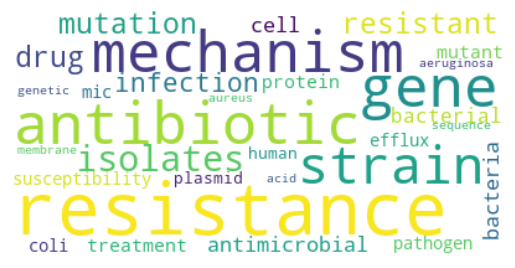

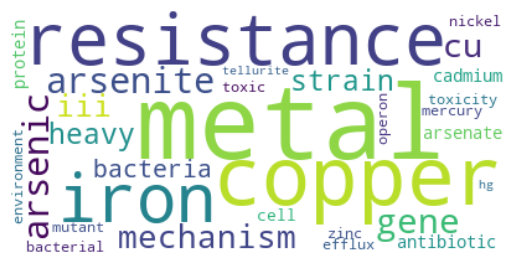

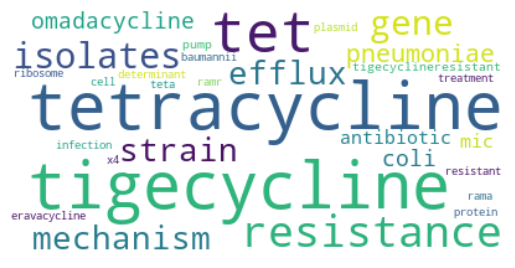

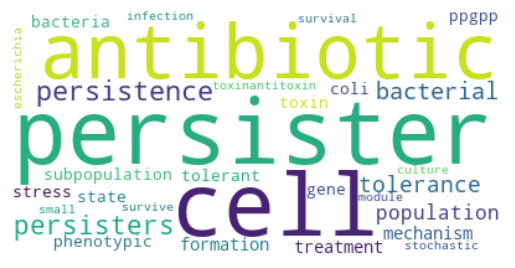

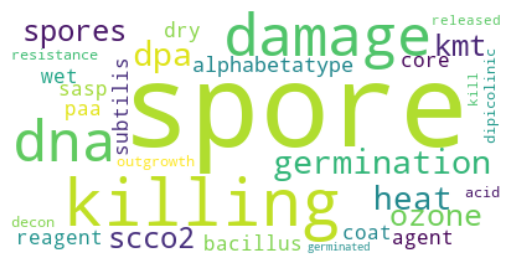

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
for i in range(5):
    create_wordcloud(topic_model, topic=i)

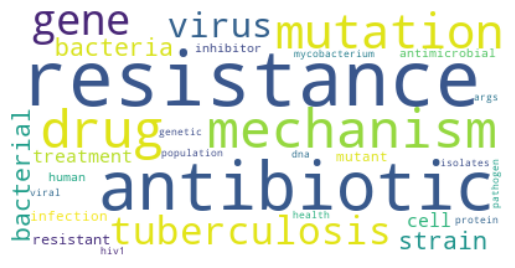

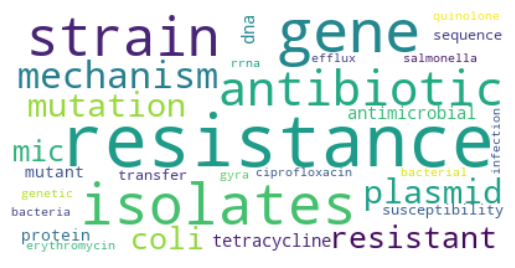

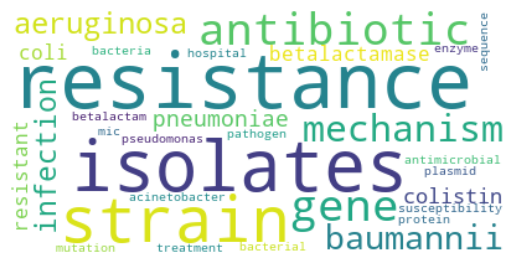

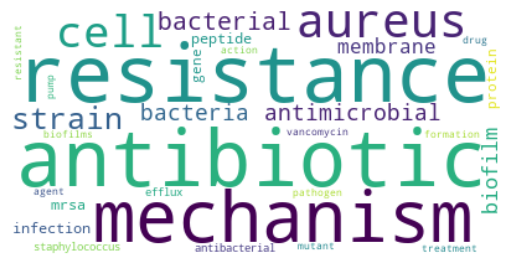

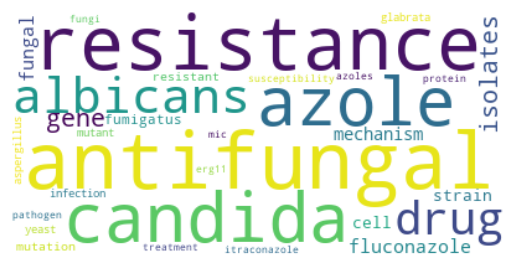

In [66]:
for i in range(5):
    create_wordcloud(topic_model, topic=i)

In [7]:
topic_model = BERTopic(nr_topics=5, umap_model=umap_model, hdbscan_model=cluster_model,language="english", calculate_probabilities=True,top_n_words=30,verbose=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(review_lemmatized)
topic_model.get_topic_info()
topic_model.visualize_barchart(top_n_topics=12)

NameError: name 'cluster_model' is not defined

In [70]:
print(topic_model.get_topics())

{0: [('resistance', 0.06641031310157366), ('antibiotic', 0.043636155853521465), ('gene', 0.03944764148903021), ('mechanism', 0.03572100192954142), ('strain', 0.031627049997062374), ('mutation', 0.03047625204215566), ('isolates', 0.029655971637996006), ('drug', 0.02394007477686018), ('resistant', 0.021937264116898964), ('bacteria', 0.017352227065465808), ('bacterial', 0.017250194679389076), ('antimicrobial', 0.017003534728080295), ('mutant', 0.01661081929925655), ('coli', 0.016235583047360336), ('treatment', 0.016111075844440617), ('infection', 0.01561581673068056), ('cell', 0.015414773455613106), ('protein', 0.015343659731395284), ('plasmid', 0.01494669040062022), ('dna', 0.014225046173995289), ('tuberculosis', 0.014040555675855456), ('susceptibility', 0.013082763587142422), ('mic', 0.012607710892345683), ('genetic', 0.012350504806639205), ('human', 0.012030303259910731), ('sequence', 0.011413820026605388), ('virus', 0.011292248750574413), ('pathogen', 0.010899736736899576), ('acid', 0

In [9]:
from transformers import AutoTokenizer, AutoModel
from bertopic import BERTopic
import torch
from umap import UMAP
from sklearn.cluster import KMeans
#corpus_list = [[id2word[id] for id, freq in doc] for doc in corpus] 
#review_lemmatized = [doc for doc in corpus_list]
review_lemmatized = reviews_datasets['cleaned_text'] .tolist()
cluster_model = KMeans(n_clusters=50)
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Check if GPU is available
if torch.cuda.is_available():
    # Set device to GPU
    device = torch.device("cuda")
else:
    # Set device to CPU
    device = torch.device("cpu")

# Create a tensor on the selected device
tensor = torch.randn(10, 10).to(device)

# Perform a computation on the tensor
result = tensor.matmul(tensor.transpose(0, 1))

# Move the result tensor back to the CPU (if needed)
result = result.cpu()
# Load pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = AutoModel.from_pretrained('bert-base-cased')
topic_model = BERTopic(nr_topics=5, umap_model=umap_model, hdbscan_model=cluster_model,language="english", calculate_probabilities=True,top_n_words=30, embedding_model=model)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(review_lemmatized)
topic_model.get_topic_info()
topic_model.visualize_barchart(top_n_topics=12)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
print(topic_model.get_topics())

{0: [('resistance', 0.060529894168972996), ('antibiotic', 0.0402457933862672), ('gene', 0.0359757601945267), ('mechanism', 0.03464657180308998), ('resistant', 0.034460046559567165), ('strain', 0.033426067795709946), ('isolates', 0.032577097513967083), ('drug', 0.022116424056784618), ('mutation', 0.020144769616549815), ('infection', 0.019711114314731864), ('cell', 0.019153328019911396), ('antimicrobial', 0.018587716697749862), ('bacteria', 0.01787232112236131), ('bacterial', 0.017219899949199497), ('beta', 0.017150408839983672), ('protein', 0.014947834550749137), ('mutant', 0.014502146848715444), ('treatment', 0.014464936695037718), ('coli', 0.014191937410849998), ('susceptibility', 0.013975703444816355), ('mic', 0.0138645455192515), ('pathogen', 0.013606043443388864), ('plasmid', 0.013559937572722364), ('efflux', 0.013280144704037622), ('multidrug', 0.010882897542125512), ('aeruginosa', 0.010688382326122767), ('acid', 0.010484755169667844), ('membrane', 0.010167950415186585), ('sequenc

In [ ]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model)


In [11]:
from bertopic.vectorizers import ClassTfidfTransformer
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model)
topic_model = BERTopic(nr_topics=5, umap_model=umap_model,ctfidf_model=ctfidf_model, hdbscan_model=cluster_model,language="english", calculate_probabilities=True,top_n_words=30, embedding_model=model)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(review_lemmatized)
topic_model.get_topic_info()
topic_model.visualize_barchart(top_n_topics=12)

In [12]:
print(topic_model.get_topics())

{0: [('resistance', 0.34966669698808817), ('isolates', 0.3231975679093993), ('resistant', 0.31922635103289737), ('strain', 0.3161157854192105), ('mechanism', 0.31379467409205714), ('gene', 0.3122891512872721), ('antibiotic', 0.2996039284190125), ('drug', 0.2895686121291907), ('mutation', 0.2809125056685646), ('infection', 0.27247352840930383), ('cell', 0.26488566623455184), ('beta', 0.2646066291356298), ('antimicrobial', 0.2558206754999471), ('mutant', 0.2511690001593965), ('protein', 0.2497158681979523), ('susceptibility', 0.24903283033517687), ('mic', 0.2442943252501984), ('treatment', 0.24125845105199706), ('bacteria', 0.2411798815159859), ('bacterial', 0.24002834881357132), ('efflux', 0.23849683579591666), ('plasmid', 0.2383225727413704), ('coli', 0.23089263619971617), ('pathogen', 0.23035200811192966), ('acid', 0.22462158057469628), ('aeruginosa', 0.2226942536548133), ('multidrug', 0.2212522701313331), ('membrane', 0.22084476810746428), ('pump', 0.2178016229592186), ('sequence', 0

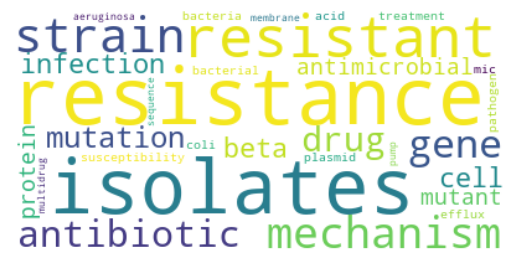

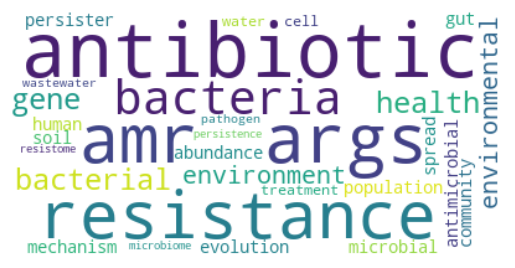

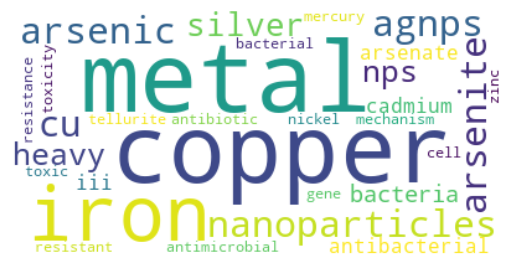

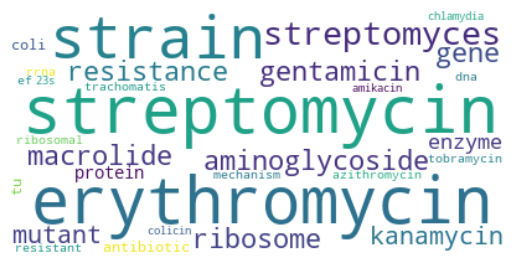

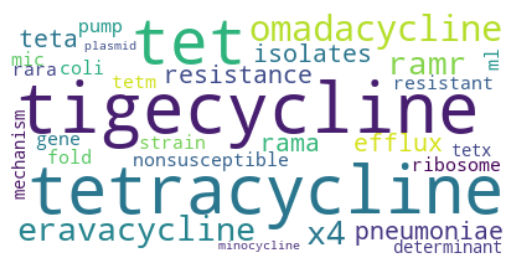

In [15]:
for i in range(5):
    create_wordcloud(topic_model, topic=i)

In [16]:
print(topic_model.get_topic_info())

   Topic  Count                                             Name
0      0   6567           0_resistance_isolates_resistant_strain
1      1    694                 1_antibiotic_args_amr_resistance
2      2    262                2_metal_copper_iron_nanoparticles
3      3    205  3_streptomycin_erythromycin_strain_streptomyces
4      4    109      4_tigecycline_tetracycline_tet_omadacycline


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Compute the TF-IDF scores for the corpus
tfidf_scores = vectorizer.fit_transform(review_lemmatized)

# Get the vocabulary (i.e., list of all unique words in the corpus)
vocabulary = vectorizer.vocabulary_

# Compute the TF-IDF scores for each word in the list
#word_scores = {word: tfidf_scores[0, vocabulary[word]] for word in word_list}

# Define a threshold for the TF-IDF scores
threshold = 0.8

# Filter out words with scores above the threshold
filtered_words = [word for word in review_lemmatized if tfidf_scores[word] <= threshold]

IndexError: Index dimension must be 1 or 2

In [18]:
new_stopwords.extend(["resistance","antibiotic", "study","bla",'activity','found','two','different','identified','expression','including','clinical','showed','patient','associated','one','result','using','may','increased','presence','used','effect','among','development','level','new','analysis','observed','target','novel','However','potential','concentration','system','role','specie','method','compound','important','respectively','well','increase','due','three','high','detected','show','combination','revealed','change','rate','involved','type','common','model','addition','several','growth','data','present','within','multiple','major','class','known','tested','demonstrated','group','compared','region','factor','complex','response','determined','production','effective','strategy','control','investigated','approach','specific','reduced','various','function','many','responsible', 'ability','four','significant','similar','related','variant','profile','case','total','pathway','sensitive','studied','report','selection','performed','suggesting','higher','understanding','shown','first','substitution','active','via','selected','increasing','caused','reported','number','test','element','finding','time','highly' ])
def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=" ".join([le.lemmatize(i) for i in word_tokens if (( i.lower() not in stop_words) and ( not  i.isdigit()) and (len(i)>1) and ( le.lemmatize(i) not in stop_words) ) ])
    cleaned_text1=" ".join(alphabet(ch) for ch in tokens.split() if (ch not in exclude ))
    #cleaned_text3=" ".join(get_adjectives(ch) for ch in tokens.split())
    cleaned_text2=" ".join(ch for ch in cleaned_text1.split(".") )
    #cleaned_text2=[ch for ch in cleaned_text1.split(".")] 
    #cleaned_text3=" ".join(get_adjectives(ch) for ch in cleaned_text2 )
    new_stopwords1=" ".join([le.lemmatize(i) for i in new_stopwords]) 
    stop_words1=" ".join([le.lemmatize(i) for i in stop_words])
    cleaned_text3=" ".join(ch for ch in cleaned_text2.split() if ( ( not  ch.isdigit()) and (len(ch)>1)))
    cleaned_text=" ".join(ch for ch in cleaned_text3.split() if ( ch not in new_stopwords1 ) and ( ch not in stop_words1 ) )
    return cleaned_text
reviews_datasets['cleaned_text']=reviews_datasets['Articles'].apply(clean_text)

In [20]:
review_lemmatized = reviews_datasets['cleaned_text'] .tolist()
from bertopic.vectorizers import ClassTfidfTransformer
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model)
topic_model = BERTopic(nr_topics=5, umap_model=umap_model,ctfidf_model=ctfidf_model, hdbscan_model=cluster_model,language="english", calculate_probabilities=True,top_n_words=30, embedding_model=model)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(review_lemmatized)
topic_model.get_topic_info()
topic_model.visualize_barchart(top_n_topics=12)

In [21]:
print(topic_model.get_topic_info())

   Topic  Count                                   Name
0      0   6241  0_isolates_resistant_strain_mechanism
1      1    581       1_biofilm_biofilms_args_bacteria
2      2    471        2_amr_spore_persister_bacterial
3      3    287     3_plasmid_transfer_conjugation_dna
4      4    257              4_metal_copper_iron_agnps


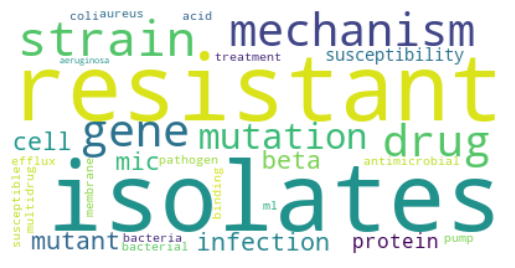

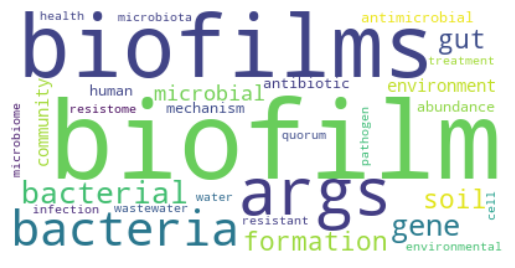

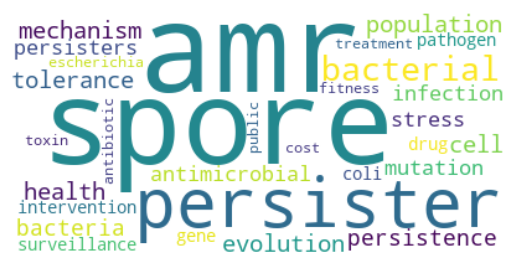

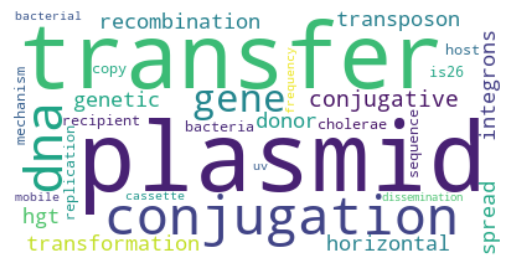

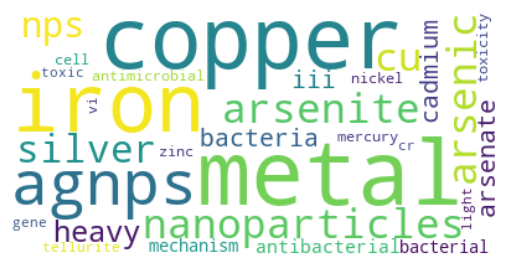

In [23]:
for i in range(5):
    create_wordcloud(topic_model, topic=i)

In [12]:
new_doc = ["Recurrent oral candidosis is a common problem in immunocompromised patients, and it is frequently triggered by resistance induced by antifungal treatment. Knowledge of the mechanisms by which the yeast persists in the host could allow the management of this type of infection. This study used electrophoretic karyotyping and restriction fragment length polymorphism based on the use of 27A probe to study 12 pairs of Candida albicans isolates from patients with recurrent candidosis to distinguish new infections from relapses caused by the same strain responsible for the first episode. Subsequently, RT-PCR was used to evaluate expression of CDR1, CDR2 and MDR1 genes, which are involved in C. albicans azole resistance, in the three pairs that consisted of variants of the same strain. Restriction polymorphism resulted in better discrimination than with karyotyping in defining differences between strains. In one case, RT-PCR allowed us to identify deregulation of efflux pump genes as the possible underlying mechanism in recurrent candidosis. The techniques employed resulted effective for the characterization of recurrent oral candidosis. Broader analysis could help to control better these infections and choose adequate therapy."]

topics, probabilites = topic_model.transform(new_doc)

print(topics)

[0]


In [14]:
new_doc = ["Pseudomonas aeruginosa opportunistic pathogen lead cause morbidity mortality cystic fibrosis immunocompromise individual eradication P aeruginosa increasingly difficult remarkable capacity resist antibiotic strain Pseudomonas aeruginosa know utilize intrinsic acquire resistance mechanism counter antibiotic adaptive antibiotic resistance P aeruginosa recently characterized mechanism include biofilm mediate resistance formation multidrug tolerant persister cell recalcitrance relapse infection discovery alternative therapeutic avenue P aeruginosa infection increasingly demand gain attention preclinical stage recent innovative therapeutic technology demonstrate pronounced effectiveness fight drug resistant P aeruginosa strain review highlight mechanism antibiotic resistance P aeruginosa discuss current state therapeutic treatment P aeruginosa infection explore practice"]

topics, probabilites = topic_model.transform(new_doc)

print(topics)

[0]


In [27]:
import spacy
from spacy.lang.en import English

nlp = spacy.load("en_core_sci_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS
exclude = set(string.punctuation)
new_stopwords = ["Background", "Main body", "Conclusion", "Methodology", "Methods", "Results", "Conclusions", "also", "Aim","Materials", "Aims", "Objective", "Design", "Interpretation", "Objectives", "Context"]
new_stopwords.extend(['study',"bla",'activity','found','two','different','identified','expression','including','clinical','showed','patient','associated','one','result','using','may','increased','presence','used','effect','among','development','level','new','analysis','observed','target','novel','However','potential','concentration','system','role','specie','method','compound','important','respectively','well','increase','due','three','high','detected','show','combination','revealed','change','rate','involved','type','common','model','addition','several','growth','data','present','within','multiple','major','class','known','tested','demonstrated','group','compared','region','factor','complex','response','determined','production','effective','strategy','control','investigated','approach','specific','reduced','various','function','many','responsible', 'ability','four','significant','similar','related','variant','profile','case','total','pathway','sensitive','studied','report','selection','performed','suggesting','higher','understanding','shown','first','substitution','active','via','selected','increasing','caused','reported','number','test','element','finding','time','highly' ])


def clean_text(headline):
    tokens = []
    doc = nlp(headline)
    for token in doc:
        if (
            not token.is_stop
            and not token.is_digit
            and len(token) > 1
            and token.lemma_ not in stop_words
        ):
            tokens.append(token.lemma_)
    tokens = " ".join(tokens)
    cleaned_text1 = "".join(
        ch for ch in tokens if ch not in exclude
    )
    cleaned_text2 = " ".join(ch for ch in cleaned_text1.split(".") )
    new_stopwords1=" ".join([nlp(i)[0].lemma_ for i in new_stopwords])
    stop_words1=" ".join([nlp(i)[0].lemma_ for i in stop_words])
    cleaned_text3 = " ".join(
        ch for ch in cleaned_text2.split() if ch not in new_stopwords1 and ch not in stop_words1
    )
    cleaned_text = " ".join(
        ch for ch in cleaned_text3.split() if ch not in new_stopwords1 and ch not in stop_words1
    )
    return cleaned_text

reviews_datasets["cleaned_text"] = reviews_datasets["Articles"].apply(clean_text)

KeyboardInterrupt: 